## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**IMPORT LIBRARIES**

**Impoting all the important libraries.**

In [ ]:
#import the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pg
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

We imported all the important libraries for the purpose of using functionality.

**For reading dataset into pandas dataframe**

In [ ]:
# Mount your drive 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Read the data set of "Hotel Booking" from variable name data
data= pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")

The purpose of loading the data "hotel_bookings.csv" into a dataframe.

In [ ]:
#creating a copy of dataset
df=data.copy()

Coping the whole dataset from variable "data" to"df" using the independent copy function.

In [ ]:
#Printing the data
df


To print the data in column wise manner after upload the csv file in the dataframe.

In [ ]:
#To find out the shape of data
df.shape

For the better understanding, we print the shape of data which shows the number of column and rows. We have total 119390 rows and 32 columns.

In [ ]:
#Print head of dataframe
df.head()

In [ ]:
#Print tail of dataframe
df.tail()

Here we have pinted 5 top and bottom rows of the date using 'Head' and 'Tail' method.

In [ ]:
#To show all the columns of the dataset
df.columns

To get all the columns of the Pandas dataframe.

In [ ]:
#To show the information of all the important aspects of dataset 
df.info()

To print a concise summary of a DataFrame.

In [ ]:
#Describe summary of the dataset
df.describe(include="all")

This is function is applied to get a descriptve summary of data set.

In [ ]:
#To transpose data
df.describe().T

With the describe function T property used to transpose the data where columns are converted into the rows and rows became columns.

In [ ]:
#To find out duplicate values 
df[df.duplicated()].shape

In [ ]:
#To count the duplicated values 
df.duplicated().value_counts()

In [ ]:
#Drop duplicate values 
df= df.drop_duplicates()
df.shape

Above 3 steps are used to find out the duplicate values and removing them. Current data is important and must be in precise form.

In [ ]:
#To find the size of the data
df.size

In [ ]:
#Shape of unique values of data set (after removing duplicate values)
df.shape

In [ ]:
#To find null values
df.isnull().sum().sort_values(ascending=False)

In [ ]:
#Removing null values
df=df.drop(['company'],axis=1)
df["agent"].fillna(0, inplace = True)  

In [ ]:
df = df.dropna(axis = 0)

In [ ]:
#Detecting null values 
df.isnull().sum()

With this step we are able to get rid of the null values that existed within some columns. While one approach can simply eliminate the whole column, the fact that there is existing data is still important as that there is a sizable presence for that existing data.

In [ ]:
#Dateset after removing null values
df.shape

This is the shape of unique data after removing null values.

#**Here we can see some outliers.**

**Lets build boxplots to see it better.**

In [ ]:
#Check outliers in numerical columns with seaborn boxplot
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
plt.figure(figsize=(20,15))
m=1
for i in columns:
  plt.subplot(4,4,m)
  m = m+1
  sns.boxplot(df[i])

NameError: ignored

In [ ]:
#Operations to cleanup outliers.
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr >= 1000, 'adr'] = 800

In [ ]:
#rechecking outlier existance.
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
plt.figure(figsize=(20,15))
m=1
for i in columns:
  plt.subplot(4,4,m)
  m = m+1
  sns.boxplot(df[i])

**Q 1 - In which year customer arrived most?**

In [ ]:
# Yearly bookings of the hotel by customer
hotel_booking1=df.groupby('arrival_date_year')['hotel'].count()
hotel_booking1

arrival_date_year
2015    13200
2016    42124
2017    31616
Name: hotel, dtype: int64

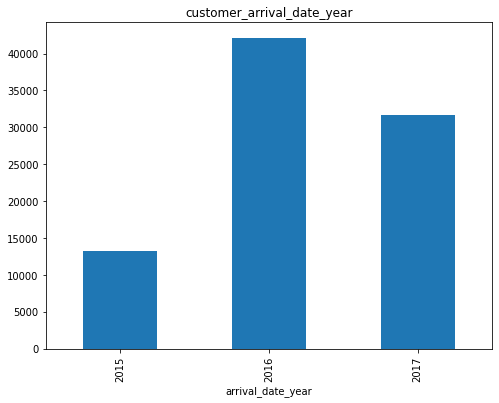

In [ ]:
hotel_booking1.plot(kind='bar', figsize = (8,6), title = 'customer_arrival_date_year')

Above graph shows that maximum customer arrive in hotels in year 2016.

**Q2 - Which country represent the maximum number of bookings?**

In [ ]:
#country with their total bookings  
country_count = df['country'].value_counts().to_frame()
country_count.columns = ['Count']
fig_country = px.choropleth(country_count, color='Count',
                    locations=country_count.index,
                    hover_name=country_count.index,
                    color_continuous_scale=px.colors.sequential.YlGn)
fig_country.update_traces(marker=dict(line=dict(color='#7201a8', width=1)))
fig_country.update_layout(title_text='Number of Records by Countries',
                  title_x=0.5, title_font=dict(size=29),)
fig_country.show()


Around 40% of all bookings were booked from Portugal followed by Great Britain(10%) & France(8%).

**Q3 - Most ordered meal at hotel?**

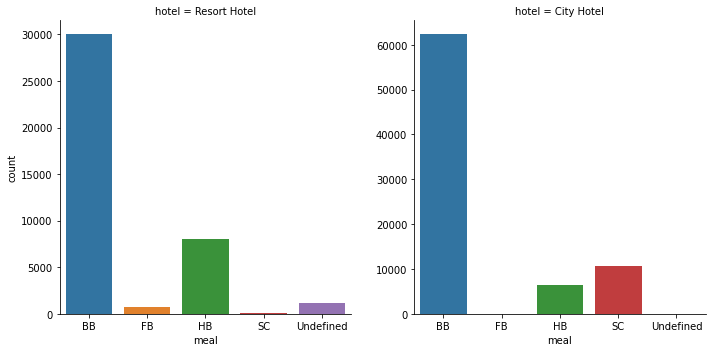

In [ ]:
#ordered meal at the hotel
sns.catplot(data=data,x='meal',col='hotel',col_wrap=2, kind='count',sharey=False);

Out of the meals, BB (Bed & Breakfast) is the most ordered meal which is around 77.2%, followed by HB(Half Board), SC(no meal package), Undefined and FB (Full Board).

**Q4 - Relation between deposit type and cancellation?**

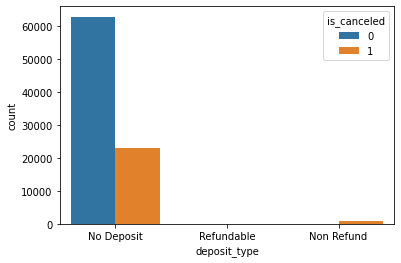

In [ ]:
#deposit type with cancellation
sns.countplot('deposit_type', hue='is_canceled', data=df)

Here we observe that Refundable is least type of preferred deposit amongst all. 

Cancellation is higher in hotel which offers no deposite/no advance payment. And is pretty lower in refundable & non-refundable deposit type. 

**Q5 - Number of customers stays on weekend nights?**

In [ ]:
#number of customer stays in weekend night
df.groupby('hotel')['stays_in_weekend_nights'].value_counts().unstack()

stays_in_weekend_nights,0,1,2,3,4,5
hotel,,,,,,
City Hotel,23244,15169,14306,301,276,122
Resort Hotel,11610,7389,12063,843,1452,165


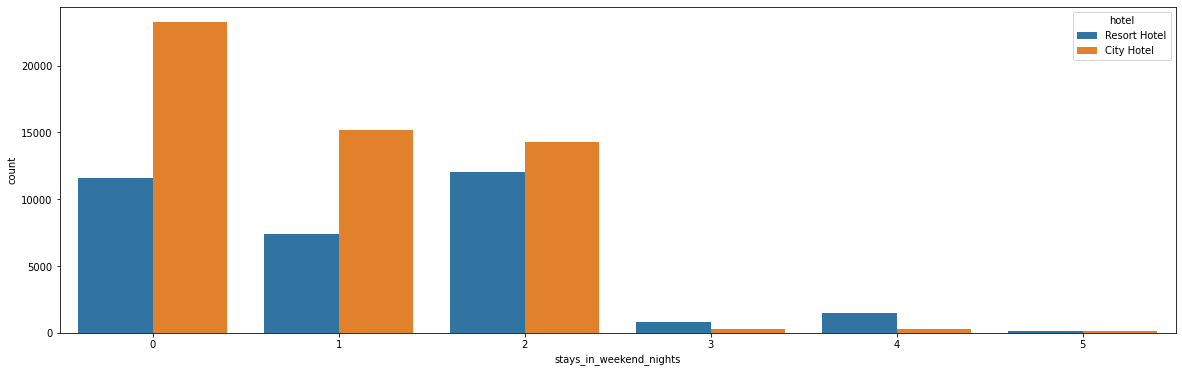

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot('stays_in_weekend_nights', hue='hotel', data=df)

**Number of customers stays on week nights?**

In [ ]:
## monthly bookings of the hotel by customer
df.groupby('hotel')['stays_in_week_nights'].value_counts().unstack()

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,10
hotel,,,,,,,,,,,
City Hotel,3794,14471,14787,11568,4864,2889,359,193,155,69,269
Resort Hotel,2335,7503,5848,4653,3001,6758,1012,772,456,150,1034


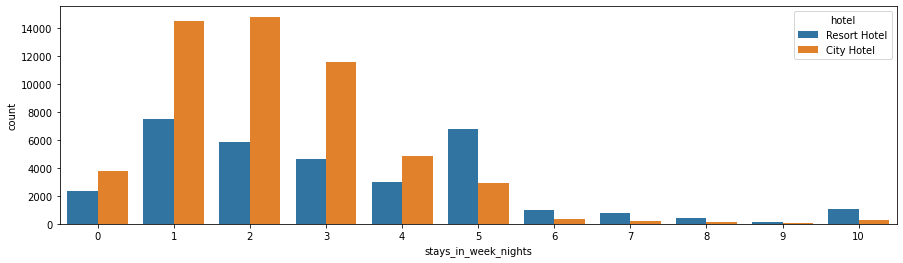

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot("stays_in_week_nights", hue="hotel", data=df)

We observe that weekday night stays were more in City Hotel as compare to weekend night.